In [41]:
from destasis import json2df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# EXCEL mit Kreis Daten
df = pd.read_excel('Geodaten_Kreise\\04-kreise.xlsx', sheet_name='Kreisfreie Städte u. Landkreise')

df = df[df["KREISE"].str.len() == 5]
df = df[["KREISE", "Kreis / Landkreis",	"Fläche", "insgesamt"]]
df

,KREISE,Kreis / Landkreis,Fläche,insgesamt
2,01001,"Flensburg, Stadt",56.73,92667.0
3,01002,"Kiel, Landeshauptstadt",118.65,248873.0
4,01003,"Lübeck, Hansestadt",214.19,219044.0
5,01004,"Neumünster, Stadt",71.66,80185.0
6,01051,Dithmarschen,1428.17,135653.0
...,...,...,...,...
466,16073,Saalfeld-Rudolstadt,1008.78,101044.0
467,16074,Saale-Holzland-Kreis,815.24,83643.0
468,16075,Saale-Orla-Kreis,1151.31,78619.0
469,16076,Greiz,845.98,95563.0


In [31]:
# Übertragung der Gruppenwerte
gruppen = [
    ['06611', '06633'],
    ['10041', '10042', '10043', '10044', '10045', '10046'],
    ['12052', '12071']
]

for gruppe in gruppen:
    val = df.loc[df['KREISE'].isin(gruppe), 'Fläche'].sum()
    df.loc[df['KREISE'].isin(gruppe), 'Fläche'] = val
    val = df.loc[df['KREISE'].isin(gruppe), 'insgesamt'].sum()
    df.loc[df['KREISE'].isin(gruppe), 'insgesamt'] = val

# Bevölerungsdichte
df['Dichte'] = df['insgesamt'] / df['Fläche']

df[df['KREISE'].isin(['10041', '10042', '10043', '10044', '10045', '10046'])]

,KREISE,Kreis / Landkreis,Fläche,insgesamt,Dichte
375,10041,Regionalverband Saarbrücken,555554.16,214795584.0,386.633022
376,10042,Merzig-Wadern,555554.16,214795584.0,386.633022
377,10043,Neunkirchen,555554.16,214795584.0,386.633022
378,10044,Saarlouis,555554.16,214795584.0,386.633022
379,10045,Saarpfalz-Kreis,555554.16,214795584.0,386.633022
380,10046,St. Wendel,555554.16,214795584.0,386.633022


In [77]:
#Daten laden und doppelte Aufenthalttitel löschen
df_stat = json2df("12521-0043_2024_Kreise")
df_stat = df_stat[~df_stat["RECGL3"].isin(["REC-AE-02", "REC-AE-03", "REC-AE-04", "REC-AE-05", "REC-AE-06", "REC-AE-07"])]
df_stat["Value"].sum()

np.int64(13958515)

In [73]:
df2 = df_stat.groupby(["KREISE"])["Value"].sum().reset_index()
df2 = df2.merge(df, on="KREISE")
df2["Anteil"] = df2["Value"] / df2['insgesamt'] * 100
df2

,KREISE,Value,Kreis / Landkreis,Fläche,insgesamt,Dichte,Anteil
0,01001,18345,"Flensburg, Stadt",56.73,92667.0,1633.474352,19.796691
1,01002,37130,"Kiel, Landeshauptstadt",118.65,248873.0,2097.538980,14.919256
2,01003,32085,"Lübeck, Hansestadt",214.19,219044.0,1022.662122,14.647742
3,01004,14285,"Neumünster, Stadt",71.66,80185.0,1118.964555,17.815053
4,01051,13000,Dithmarschen,1428.17,135653.0,94.983790,9.583275
...,...,...,...,...,...,...,...
395,16073,6065,Saalfeld-Rudolstadt,1008.78,101044.0,100.164555,6.002336
396,16074,4925,Saale-Holzland-Kreis,815.24,83643.0,102.599235,5.888120
397,16075,4860,Saale-Orla-Kreis,1151.31,78619.0,68.286561,6.181712
398,16076,4740,Greiz,845.98,95563.0,112.961299,4.960079


<Axes: xlabel='Dichte', ylabel='Anteil'>

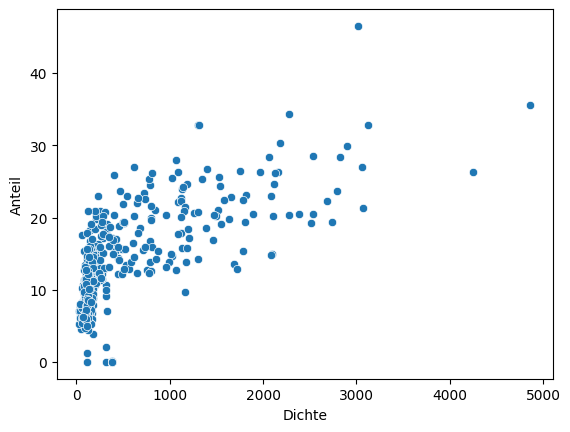

In [74]:
sns.scatterplot(df2, x="Dichte", y="Anteil")

In [75]:
df3 = df_stat.groupby(["KREISE", "Ausgewählte Aufenthaltstitel"])["Value"].sum().reset_index()
df3 = df3.merge(df, on="KREISE")
df3["Anteil"] = df3["Value"] / df3['insgesamt'] * 100
df3

,KREISE,Ausgewählte Aufenthaltstitel,Value,Kreis / Landkreis,Fläche,insgesamt,Dichte,Anteil
0,01001,Antrag auf einen Aufenthaltstitel gestellt,720,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.776976
1,01001,Aufenthaltsgestattung,220,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.237409
2,01001,Aufenthaltsrecht nach FreizügG/EU,8525,"Flensburg, Stadt",56.73,92667.0,1633.474352,9.199607
3,01001,Befristete Aufenthaltserlaubnis,6450,"Flensburg, Stadt",56.73,92667.0,1633.474352,6.960407
4,01001,Duldung,105,"Flensburg, Stadt",56.73,92667.0,1633.474352,0.113309
...,...,...,...,...,...,...,...,...
3195,16077,Befristete Aufenthaltserlaubnis,4020,Altenburger Land,569.42,88692.0,155.758491,4.532540
3196,16077,Duldung,85,Altenburger Land,569.42,88692.0,155.758491,0.095837
3197,16077,"Ohne Aufenthaltstitel, Duldung oder Gestattung",90,Altenburger Land,569.42,88692.0,155.758491,0.101475
3198,16077,Unbefristete Niederlassungserlaubnis,365,Altenburger Land,569.42,88692.0,155.758491,0.411537


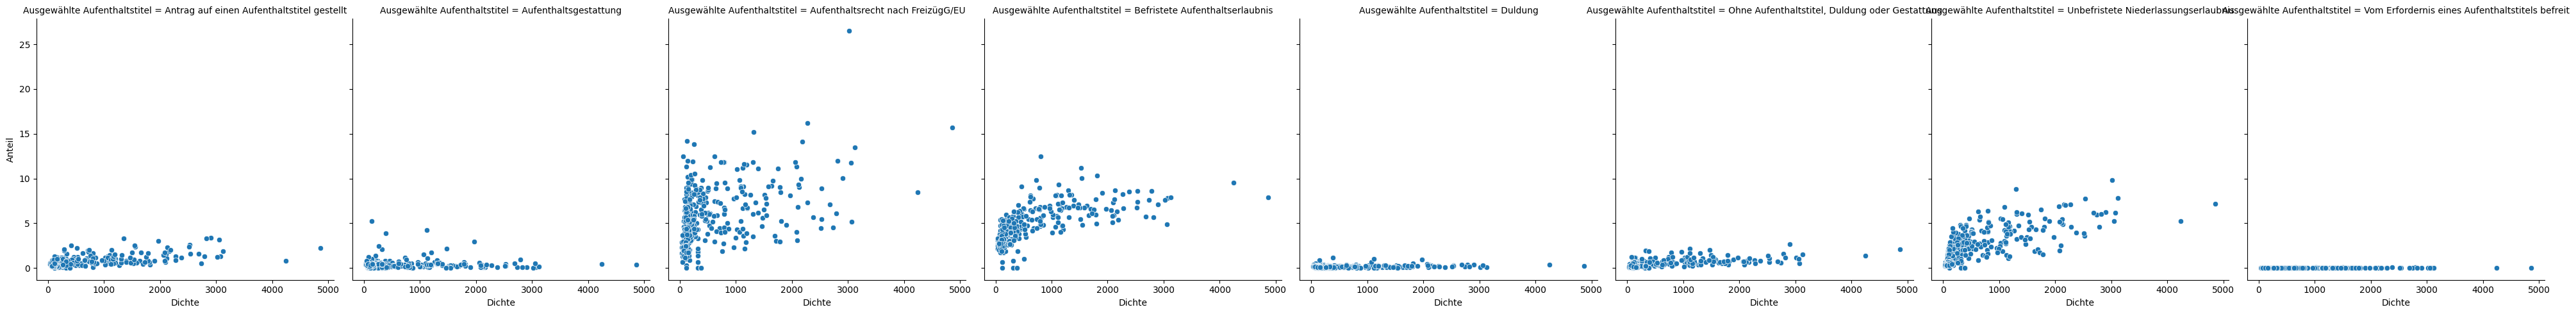

In [76]:
sns.relplot(df3, x="Dichte", y="Anteil", col="Ausgewählte Aufenthaltstitel")

In [79]:
df_stat.groupby(["Ausgewählte Aufenthaltstitel"])["Value"].sum().reset_index()

,Ausgewählte Aufenthaltstitel,Value
0,Antrag auf einen Aufenthaltstitel gestellt,739080
1,Aufenthaltsgestattung,342205
2,Aufenthaltsrecht nach FreizügG/EU,5289225
3,Befristete Aufenthaltserlaubnis,4291065
4,Duldung,168565
5,"Ohne Aufenthaltstitel, Duldung oder Gestattung",524425
6,Unbefristete Niederlassungserlaubnis,2597465
7,Vom Erfordernis eines Aufenthaltstitels befreit,6485


In [57]:
18192930-4291065

13901865

In [80]:
df3.to_csv("scatter_plot_anteil_dichte.csv")